# LangChain LLM Chains with LCEL
* Notebook by Adam Lang
* Date: 8/16/2024

# Overview
* In this notebook I will go over implementation of a simple LLM chain with LCEL in LangChain.
* A simple LCEL chain looks like this:

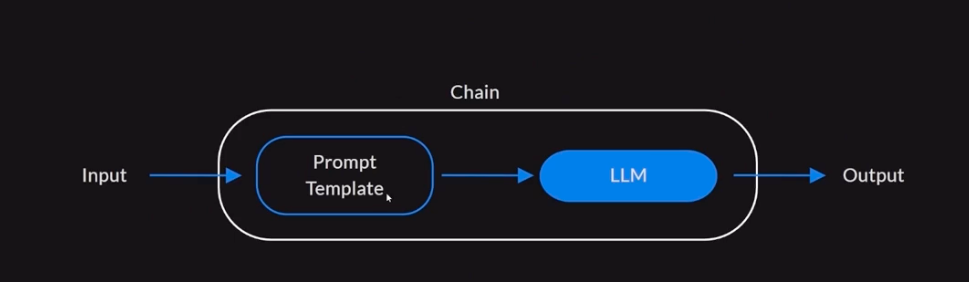

## Install Dependencies

In [1]:
!pip install langchain==0.2.0
!pip install langchain-openai==0.1.7
!pip install langchain-community==0.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.7/973.7 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.5/361.5 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31

In [3]:
## library for drawing text graphs
!pip install grandalf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.3 MB/s eta 0:00:00


## Enter Open AI key

In [4]:
from getpass import getpass


OPENAI_KEY = getpass('Enter your OPENAI API KEY: ')

Enter your OPENAI API KEY: ··········


## Set environment variables

In [5]:
import os


os.environ['OPENAI_API_KEY'] = OPENAI_KEY

## Load Connection to LLM of choice
* Here we will use ChatGPT

In [6]:
from langchain_openai import ChatOpenAI

## instantiate LLM
chatgpt = ChatOpenAI(model_name='gpt-3.5-turbo', temperature=0)

# LangChain Chains Implementation

### LCEL LLM Chains in LangChain
* LCEL is the langchain expression language that connects prompts, models, parsers and retrieval components using a `|` operator.
* You can chain things in sequences.
  * The output of the previous runnable's `.invoke()` call is passed as input to the next runnable.
  * This is simply done with a pipe operator `|` or actually a method called pipe which is `.pipe()`.
  * The resulting `RunnableSequence` is runnable meaning it can be:
     * 1. invoked
     * 2. streamed
     * 3. or further chained.

In [10]:
## LCEL chains
from langchain_core.prompts import ChatPromptTemplate

## input text
prompt_txt = """Explain to me about {topic} in 3 bullet points"""
## prompt
prompt = ChatPromptTemplate.from_template(prompt_txt)

## writing this as: llm_chain = prompt | chatgpt
llm_chain = (
    prompt
      |
    chatgpt

)

## can also write as this:
llm_chain = prompt | chatgpt

### Visualizing LLM Chains
* Can use any of these steps below.

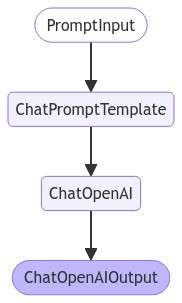

In [11]:
## display graph
from IPython.display import Image, display

display(Image(llm_chain.get_graph().draw_mermaid_png()))

In [12]:
## using grandalf to draw graph of chain
print(llm_chain.get_graph().draw_ascii())

    +-------------+    
    | PromptInput |    
    +-------------+    
           *           
           *           
           *           
+--------------------+ 
| ChatPromptTemplate | 
+--------------------+ 
           *           
           *           
           *           
    +------------+     
    | ChatOpenAI |     
    +------------+     
           *           
           *           
           *           
 +------------------+  
 | ChatOpenAIOutput |  
 +------------------+  


In [13]:
## invoke response from chain
response = llm_chain.invoke({'topic' : 'Generative AI'})
response

AIMessage(content='- Generative AI is a type of artificial intelligence that is capable of creating new content, such as images, text, or music, based on patterns and data it has been trained on.\n- This technology uses algorithms to generate content that is original and unique, often mimicking human creativity and imagination.\n- Generative AI has a wide range of applications, including creating art, writing stories, and composing music, and is increasingly being used in industries such as marketing, design, and entertainment.', response_metadata={'token_usage': {'completion_tokens': 98, 'prompt_tokens': 20, 'total_tokens': 118}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-ea355d4b-35be-45b0-b659-31d53aaf8ef4-0')

In [14]:
## get response content
print(response.content)

- Generative AI is a type of artificial intelligence that is capable of creating new content, such as images, text, or music, based on patterns and data it has been trained on.
- This technology uses algorithms to generate content that is original and unique, often mimicking human creativity and imagination.
- Generative AI has a wide range of applications, including creating art, writing stories, and composing music, and is increasingly being used in industries such as marketing, design, and entertainment.


Adding an **output parser** will transform LLM response to a string.

In [15]:
## import StrOutputParser
from langchain_core.output_parsers import StrOutputParser

# chain with output parser
llm_chain = (
    prompt
      |
    chatgpt
      |
    StrOutputParser()
)

### Visualize Chain
* We can see the new step we added below is the `StrOutputParser` which transforms output to a string.

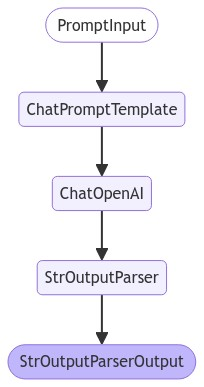

In [16]:
display(Image(llm_chain.get_graph().draw_mermaid_png()))

In [17]:
## invoke LLM response
response = llm_chain.invoke({'topic': 'Generative AI'})
print(response)

- Generative AI is a type of artificial intelligence that is capable of creating new content, such as images, text, or music, based on patterns and data it has been trained on.
- This technology uses algorithms to generate content that is original and unique, often mimicking human creativity and imagination.
- Generative AI has a wide range of applications, including creating art, writing stories, and composing music, and is increasingly being used in industries such as marketing, design, and entertainment.


In [18]:
## adding customer reviews
reviews = [
    f"""
    Purchased this adorable koala plush toy for my nephew's birthday,
    and he's absolutely smitten with it, carrying it around everywhere he goes.
    The plush is incredibly soft, and the koala's face has an endearing expression.
    However, I did find it a tad on the smaller side given its price point.
    I believe there may be larger alternatives available at a similar price.
    To my delight, it arrived a day earlier than anticipated,
    allowing me to enjoy it briefly before gifting it to him.
    """,
    f"""
    Required a stylish lamp for my office space, and this particular one
    came with added storage at a reasonable price.
    The delivery was surprisingly quick, arriving within just two days.
    However, the pull string for the lamp suffered damage during transit.
    To my relief, the company promptly dispatched a replacement,
    which arrived within a few days. Assembly was a breeze.
    Then, I encountered an issue with a missing component,
    but their support team responded swiftly and provided the missing part.
    It appears to be a commendable company that genuinely values its
    customers and the quality of its products.
    """
    ]

In [19]:
## create prompt template
from langchain_core.prompts import ChatPromptTemplate

## prompt
prompt = """
        You are a very experienced product review analyst.
        Your task is to generate a short summary of a product
        review from an ecommerce site.

        Generate a summary of the review of maximum 2 lines.
        Also include both the positives and negatives from the review, maximum 2 bullet points.

        ```{review}```
        """

## setup prompt template
prompt_template = ChatPromptTemplate.from_template(prompt)
## llm_chain
llm_chain = (
    prompt_template
         |
    chatgpt
         |
    StrOutputParser()
)

In [20]:
## invoke llm response from chain
result = llm_chain.invoke({'review': reviews[0]})

In [21]:
## get result
result

"Summary: Adorable and soft koala plush toy loved by recipient, but slightly small for the price.\n\nPositives:\n- Incredibly soft plush material\n- Endearing expression on the koala's face\n\nNegatives:\n- Smaller size than expected for the price\n- Larger alternatives available at a similar price"

In [22]:
## print result
print(result)

Summary: Adorable and soft koala plush toy loved by recipient, but slightly small for the price.

Positives:
- Incredibly soft plush material
- Endearing expression on the koala's face

Negatives:
- Smaller size than expected for the price
- Larger alternatives available at a similar price


Summary:
* We can see printing the result is a better format.
* The raw `result` contains new line characters.

Using a Chain with multiple reviews

In [23]:
formatted_reviews = [{'review': review}
                              for review in reviews]

# invoke results
results = llm_chain.map().invoke(formatted_reviews)
len(results)

2

In [24]:
## get formatted response
for result in results:
  print(result)
  print()

Summary: Adorable and soft koala plush toy loved by recipient, but slightly small for the price.

Positives:
- Incredibly soft plush material
- Endearing expression on the koala's face

Negatives:
- Smaller size than expected for the price
- Larger alternatives may be available at a similar price

Summary: Stylish lamp with added storage, quick delivery, excellent customer service.

Positives:
- Stylish lamp with added storage
- Quick delivery and excellent customer service

Negatives:
- Pull string for lamp suffered damage during transit
- Missing component issue encountered



# Summary
* The advantage of the LCEL is you can chain multiple prompts and other tools together to get the desired output.